# Real Estate Economics & Finance

## The Role of Monetary Policy, Interest Rates and Its Relevance to Real Estate Values

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import fix_yahoo_finance
import yfinance as yf
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from IPython.display import Image
import urllib.request as url
import io
import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


# What Is the Difference Between Finance and Economics?
* At its core, economics studies **decision-making** in the face of **budget constraints** and **uncertainty**.
    * What are **budget constraints**?
    * What is **uncertainty**?



* **Finance** is a branch of economics.
    * Finance addresses ideas in **portfolio optimization**.  
    * A **portfolio** is a collection of assets whose returns are potentially correlated (either positively or negatively).  
    * In an idealized world, the holder of a portfolio can **buy** or **sell** assets to adjust the portfolio in very small increments **without fees or taxes** and without affecting asset **prices**.
    * As we will see, decisions are driven by the correlation patterns in returns and is called **diversification**.
    * The ideas can be applied to CRE, but the underlying market **microstructure** is different.  **Location, location, location** or **brick-by-brick and block-by-block**.  I like to say either L$^3$ or b$\cdot 6$.




# Three Empirical Regularities Relevant for CRE

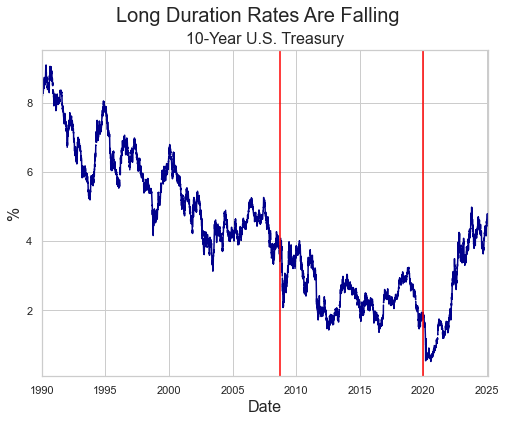

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Are Falling', fontsize=20)
plt.title('10-Year U.S. Treasury', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color="red")

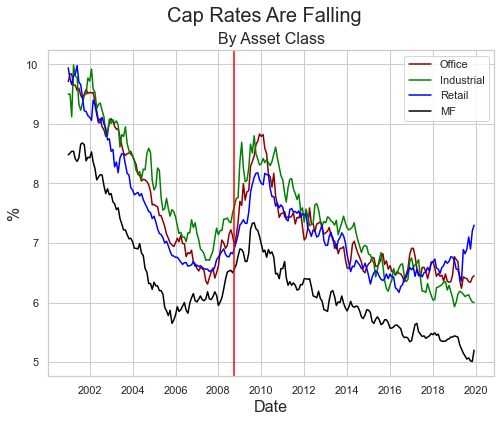

In [3]:
cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

plt.figure(figsize = (8, 6))
plt.suptitle("Cap Rates Are Falling", fontsize=20)
plt.title("By Asset Class", fontsize=16)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 10, 1), color="red")

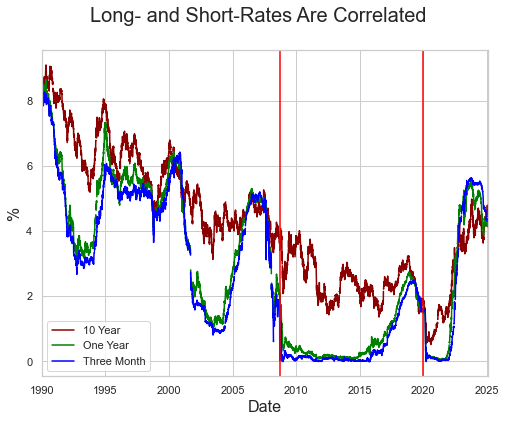

In [4]:
ten_year.plot(c='darkred', label='10 Year', figsize=(8, 6), )
one_year.plot(c='green', label='One Year')
three_month.plot(color='blue', label='Three Month')
plt.suptitle('Long- and Short-Rates Are Correlated', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color="red")

In [5]:
### Recall the Loanable Funds (LF) Model

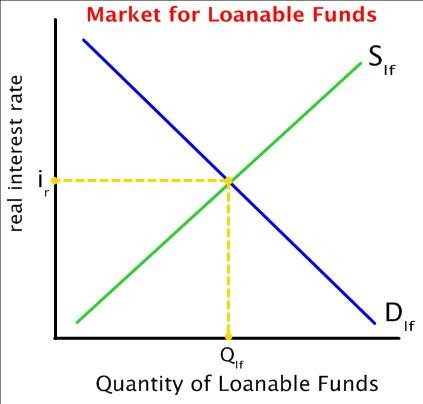

In [6]:
#from IPython.display import Image
url = 'https://sbhshgovapmacro.files.wordpress.com/2011/04/loanable-funds-graph.jpg'
Image(url, width=400, height=400)

# How and Why?
* Consider the world before the **global financial crisis of 2008/2009** and **COVID-19 of 2019/present**.



* Monetary policy involved central banks, such as the Federal Reserve (through the **Federal Reserve Open Market Committee**), buying and selling short-term government debt, such as short-term U.S. Treasurys: affecting the supply and demand of such debt, as seen in the Loanable Funds Model. 



* The mechanism by which these actions affected the real economy was through private investment, in particular residential and commercial real estate.  These are called [transmission mechanisms](https://en.wikipedia.org/wiki/Monetary_transmission_mechanism).
    * Consider the supply and demand for money using the Loanable Funds Market representation above.  
    * How does the FOMC impact the price of money?  
    * By expanding or contracting its supply?



* Post-financial crisis monetary policy involves the purchase of **private debt**, such as mortgages, to affect the long-end of the yield curve.  We called this **quantitative easing** and now **quantitative tightening**.
    * Consider the original [1913 Act](https://www.investopedia.com/terms/f/1913-federal-reserve-act.asp) that created the Federal Reserve system in the U.S.  
    * Does the current Federal Reserve have sufficient tools to conduct monetary policy?  
    * Quantitative easing is an example of a policy that may go beyond the Fed's original mandate.  (See chart below.)
    * What other tools might the Fed have in its quiver?  
        * Average inflation targeting: [AIT](https://www.cnbc.com/2020/08/27/powell-announces-new-fed-approach-to-inflation-that-could-keep-rates-lower-for-longer.html).
        * Nominal GDP targeting: [Scott Sumner](https://www.themoneyillusion.com/category/ngdp-targeting/).
        * Fed creates a market for investors to buy and sell GDP indices: [Roger Farmer](https://www.rogerfarmer.com).
    
    

* In my opinion, the Fed took the wrong path in March 2020 in the face of COVID-19, a natural distaster that created a [liquidity trap](https://en.wikipedia.org/wiki/Liquidity_trap) similar to the [1906 SF earthquake](https://en.wikipedia.org/wiki/1906_San_Francisco_earthquake). 
    * It was its original function of the lender of last resort (LOLR) that stabilized markets, following Bagehot's original (and ancient) advice.
    * But it and central banks around the world essentially bought all forms of debt (but not equity, which its prevented by law from doing).
    
    
    
* The question is now whether the Fed waited too long to begin raising interest rates.
    * Substantive policy debate.
    * See Edward Chancellor, [The Price of Time](https://www.amazon.com/Price-Time-Real-Story-Interest/dp/0802160069).



* Tools available to the Fed:
    1. OMO and Fed Funds rate.  (Now standard.)
    2. Discount window and lender of last resort.  (Original function.  Now quantitative easing.)
    3. Reserve requirements.  (Interest on excess reserves.)

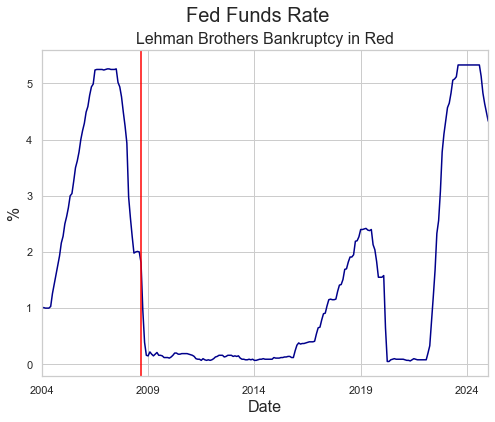

In [7]:
balance = fred.get_series("WALCL", observation_start='2004-01-01') / 1000000
fedfunds = fred.get_series("FEDFUNDS", observation_start='2004-01-01')
fedfunds.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Fed Funds Rate', fontsize=20)
plt.title('Lehman Brothers Bankruptcy in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

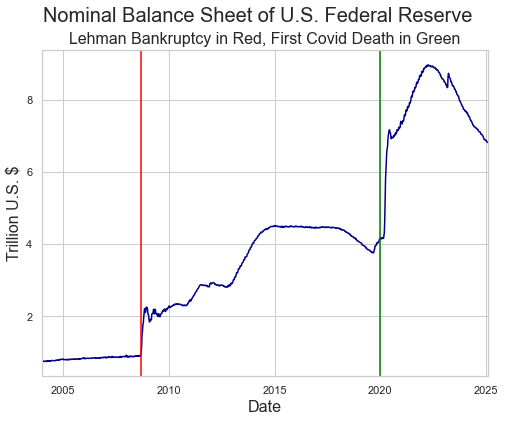

In [8]:
balance.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Nominal Balance Sheet of U.S. Federal Reserve', fontsize=20)
plt.title('Lehman Bankruptcy in Red, First Covid Death in Green', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Trillion U.S. $', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color="green")

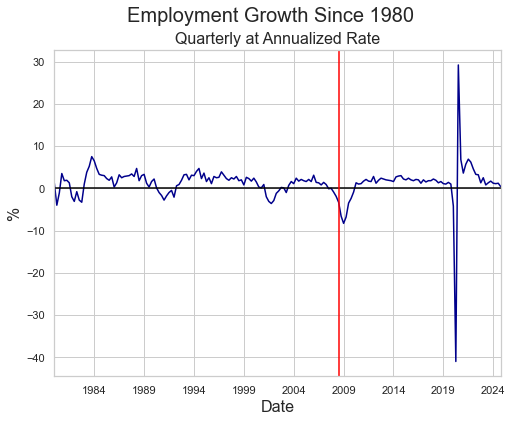

In [9]:
emp_growth = fred.get_series("PRS85006012", observation_start='1980-01-01')
emp_growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Employment Growth Since 1980', fontsize=20)
plt.title('Quarterly at Annualized Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

Text(0, 0.5, '%')

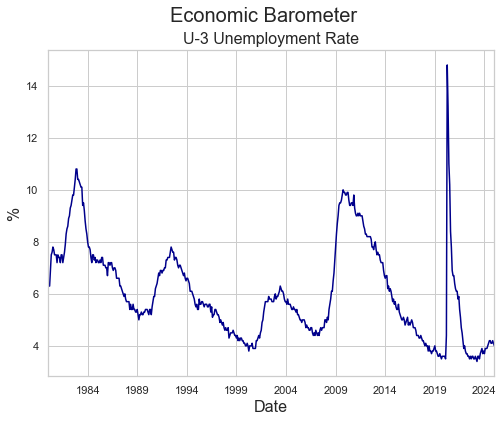

In [10]:
unemp_rate = fred.get_series("UNRATE", observation_start='1980-01-01')
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('U-3 Unemployment Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

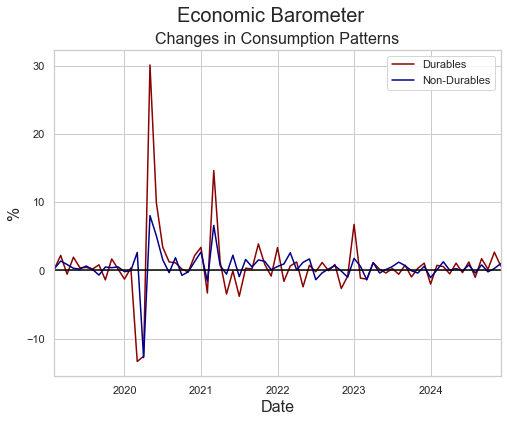

In [11]:
df = {}
df['Durables'] = fred.get_series("PCEDG", observation_start='2019-01-01').dropna()
df['Non-Durables'] = fred.get_series("PCEND", observation_start='2019-01-01').dropna()
df = pd.DataFrame(df)
df = df.pct_change(periods=1).dropna() * 100

colors = (["darkred", "darkblue"])
df.plot(figsize=(8, 6), color = colors)
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Changes in Consumption Patterns', fontsize=16)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

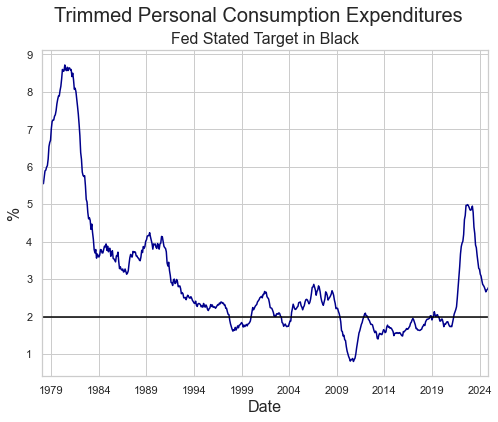

In [12]:
inflation = fred.get_series("PCETRIM12M159SFRBDAL")
inflation.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Trimmed Personal Consumption Expenditures', fontsize=20)
plt.title('Fed Stated Target in Black', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="black")

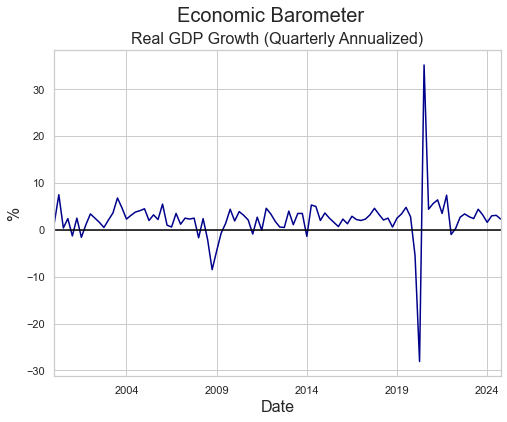

In [13]:
growth = fred.get_series("A191RL1Q225SBEA", observation_start='2000-01-01').dropna()
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Real GDP Growth (Quarterly Annualized)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")

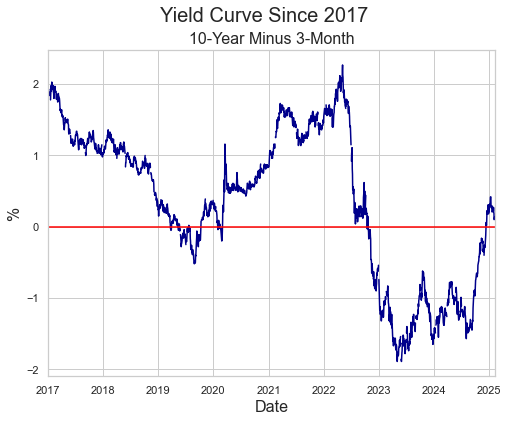

In [14]:
yield_curve = fred.get_series("T10Y3M", observation_start='2017-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Yield Curve Since 2017', fontsize=20)
plt.title('10-Year Minus 3-Month', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="red")

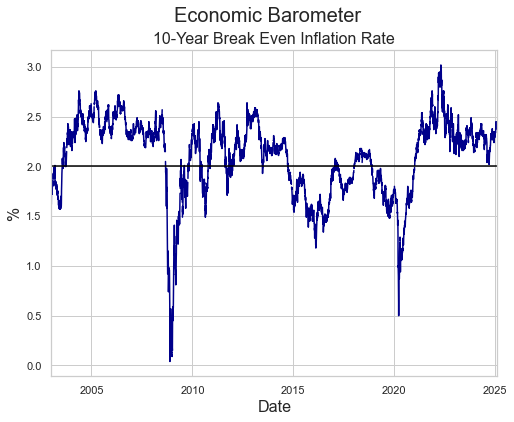

In [15]:
break_even = fred.get_series("T10YIE", observation_start='1990-01-01')
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('10-Year Break Even Inflation Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="black")

Text(0, 0.5, '%')

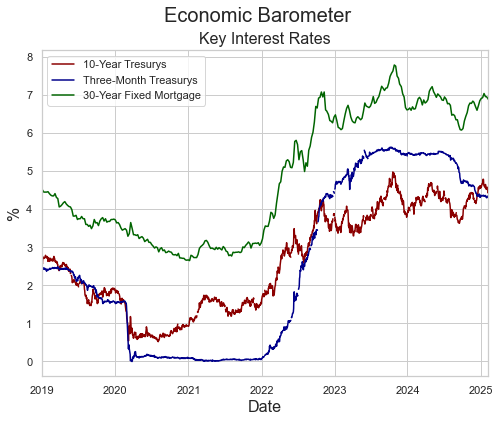

In [16]:
ten_year = fred.get_series("DGS10", observation_start='2019-01-01')
three_month = fred.get_series("DGS3MO", observation_start='2019-01-01')
ffr = fred.get_series("FEDFUNDS", observation_start='2019-01-01')
mortgage = fred.get_series("MORTGAGE30US", observation_start='2019-01-01')
yield_curve = fred.get_series("T10Y3M", observation_start='2019-01-01')

ten_year.plot(c='darkred', label='10-Year Tresurys', figsize=(8, 6), )
three_month.plot(color='darkblue', label='Three-Month Treasurys')
mortgage.plot(color='darkgreen', label='30-Year Fixed Mortgage')
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Key Interest Rates', fontsize=16)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

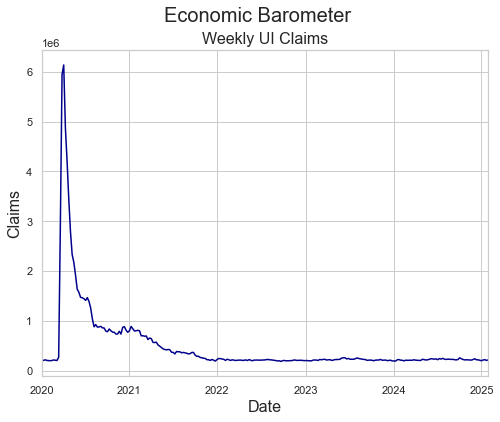

In [17]:
claims = fred.get_series("ICSA", observation_start='2020-01-01')
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Weekly UI Claims', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Claims', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

Text(0, 0.5, 'Thousands of Adults')

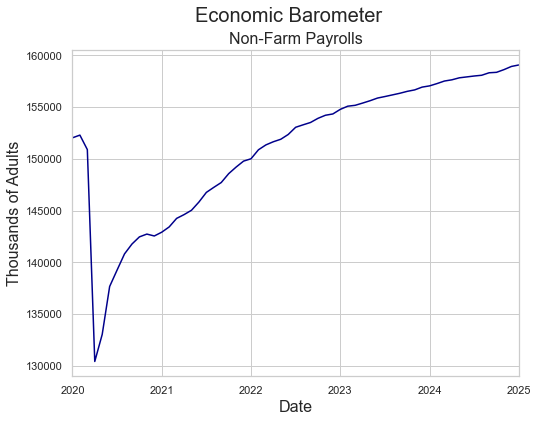

In [18]:
jobs = fred.get_series("PAYEMS", observation_start='2020-01-01')
jobs.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Non-Farm Payrolls', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Thousands of Adults', fontsize=16)

Text(0, 0.5, 'Dollars')

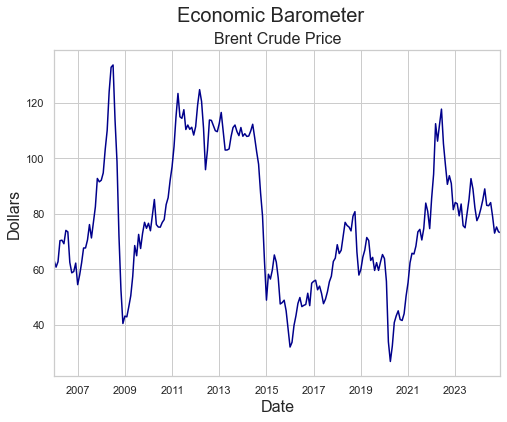

In [19]:
brent = fred.get_series("POILBREUSDM", observation_start='2006-01-01')
brent.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Brent Crude Price', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Dollars', fontsize=16)

Text(0, 0.5, '%')

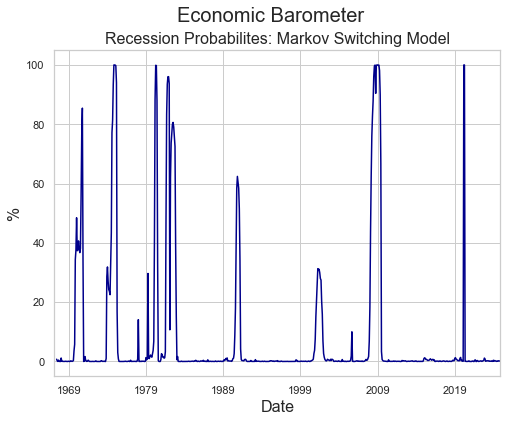

In [20]:
probabilities = fred.get_series("RECPROUSM156N")
probabilities.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Recession Probabilites: Markov Switching Model', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '100 bps')

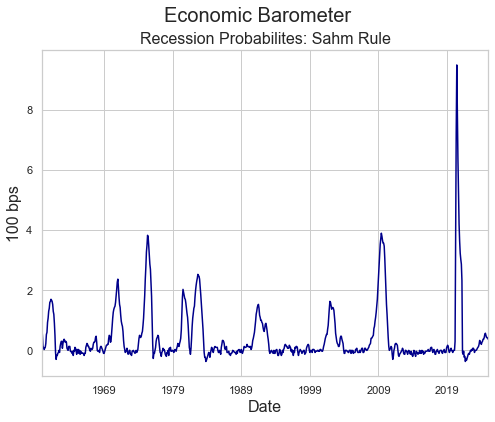

In [21]:
probabilities = fred.get_series("SAHMREALTIME")
probabilities.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Recession Probabilites: Sahm Rule', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('100 bps', fontsize=16)

## Why Does this Matter?  
* You have to consider these ideas when doing a DCF model.
* **Cap Rate Slides**: How does monentary policy impact cap rates?  It sounds complicated, but it **is not**.  

# Real Estate Finance: Themes to Date
* Economics and finance drive the mathematics.



* Economics and finance allow us to think logically about how markets might perform.
    * Excel is tool.
    * Like death and taxes, it will always be with us.
    * But there are better and free tools available to do advanced modeling.
    * One might want to stress test a portfolio using Monte Carlo simulation.
    * One might want to backtest an investment strategy.
    * One might want to simulate potential performance using open sourced data.  (See Savage, Vo, and Zhao.)
    * The future lies with open source tools, such as R and Python.




### We discount the future because it may not occur.




### We recognize that there is a trade-off between *ex ante* return and risk, and *ex post* we may lose money.



### We are able to apply all of these themes to commercial real estate, as in Chapters 21 and 22.



### Capital is global, but real estate markets are local.



### Real estate markets have complex contracts that we call leases, governing the responsibilities of all parties (landlord, tenant and their representatives).



### Real estate assets are highly heterogeneous and illiquid.
#### They provide potential yield (cash flows) and growth (price appreciation) that may be uncorrelated with equities and bonds.



### A Digression to Macroeconomics and Finance
* *Microeconomics*: the study of individual markets.
* *Macroeconomics*: the study of aggregate output, its fluctuations and their drivers.
* *Econometrics*: the use of statistical models to examine conjectures that arise from theory.
* *Finance*: the application of these ideas to money (medium of exchange, unit of account, and the store of value) and the markets on wnicn assets trade (equity, bond, cash and real estate).
    * Lots of mathematics which goes by the phrase Dynamic Stochastic General Equilibrium (DSGE) modeling.
    * See [Wickens](https://www.amazon.com/Macroeconomic-Theory-Dynamic-Equilibrium-Approach/dp/0691152861/ref=sr_1_1?crid=1ERW6CUUYN8JQ&dib=eyJ2IjoiMSJ9.JaKWR9y2lxxxCYvrpZ0yCda5u0TOi_pWQsUB-tkDc45teEJsJcMkSSyw_q_Dbho8_Byd-FAwdjomlQN-Io3mKKzyfTOiygqlXIoWGiZXIuF9jBW14n2TTlSs3-7HvJO9US6pjfnNCJ9-CBzwRQC8b-Nu062PPXaKp3BYXunNDhLQz8QgsUMYcCzzqIE3g8IzYyj8clpVEytF-VHOfXsxBNzgfpBUD7bfGT-FjupfmhM.s1EFY6ITk83869Sa0v-ACDWmg9XS1TKB6ZPsnzzKdus&dib_tag=se&keywords=michael+wickens&qid=1739217395&sprefix=michael+wickens%2Caps%2C103&sr=8-1) and [Woodford](https://www.amazon.com/Interest-Prices-Foundations-Theory-Monetary/dp/0691010498/ref=sr_1_2?crid=18OFMGL11ABTF&dib=eyJ2IjoiMSJ9.M50KRlWz2ZBhFmIzArXGdCqYmdtl-fThKEqF1VYSc9MSEYacsp5FLjDAAKGSibvrB4Xd4gIMkytG6ekGROfGnM7ZRU9rAak-6qbc0bsxjVtXNJPv6CxeKWZG40YjTI0oPiowwxfF_rEYSRgNAYWSdm7HTlBG0qDseDuffTDMtmSfeGDoRmxqPOixBgxURays3Nl3gUL6QJbt6OvdfzGAEROMvbG47uqMVVWXHmio2gs.B8PJuEnlW5l23REw_5AHltivhbptui56LL6qvezrojY&dib_tag=se&keywords=michael+woodford&qid=1739217348&sprefix=%2Caps%2C112&sr=8-2).



* We have touched on elements of each of these (and will continue to do so in your upcoming courses).
    * Microeconomics: DiPasquale-Wheaton
    * Macroeconomics: interest rate determination (via loanable funds market) and themes in finance
    * Econometrics (now A.I. more generally): modern portfolio theory and 3135
    * *I personally see no difference in any of these topics*
    
    

* The U.S. Federal Reserve was created by a 1913 Act following a large financial crisis and recession in 1907.  It is technically the banker's bank.  
    * Originally, it used the standard tool of the discount window to lend to banks under the gold standard of convertability.
    * In 1933, the gold standard was suspended.
    * During WWII, the Fed began explicit interest rate setting.
    * It was made operationally independent of the U.S. Treasury in the early 1950's under admendments to 1913 Act.
    * The role of the discount window substantially diminished, as did change the reserve ratio.  Primary focus was on OMOs.
    * **Not transparent**.  No explicit statements about overnight Fed Fund rate.  No forward guidance.  No regular testimony to Congress.
    * During the GFC, new tools were needed.  Transparency itself was seen as a tool.  